### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2020 ###

# Grade Boosters #

### Algorithms predicting the best courses should be taken by CS students based on their interests, GPA, among other factors.###

#### Student 1 (email address), Student 2 (email address), Student 3 (email address), and Student 4 (email address)

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
2. [Mathematical Model](#2.-Mathematical-model)
  1. [Data sets and Optimization algorithms used](#4.A.-Results)
  1. [Final Mathematical Model](#4.A.-Correctness)
3. [Solution](#3.-Solution)
4. [Results and Discussion](#4.-Results-and-discussion)
  1. [Results](#4.A.-Results)
  1. [Correctness](#4.A.-Correctness)
  1. [Things not taken into account](#4.A.-Things-not-taken-into-account)
  1. [Future work and application](#4.A.-Future-work-and-application)
5. [Conclusion](#5.-Conclusion)
6. [Attributions]

In [2]:
## RUN ME NOW ONLY ONCE TO INSTALL NECESSARY LIBRARIES
import Pkg;Pkg.add("PyPlot");Pkg.add("Cbc"); 

 Resolving package versions...
  Updating `C:\Users\Liyuan\.julia\environments\v1.3\Project.toml`
 [no changes]
  Updating `C:\Users\Liyuan\.julia\environments\v1.3\Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `C:\Users\Liyuan\.julia\environments\v1.3\Project.toml`
 [no changes]
  Updating `C:\Users\Liyuan\.julia\environments\v1.3\Manifest.toml`
 [no changes]


## 1. Introduction ##

This project develops an algorithm to help students in the University of Wisconsin-Madison Computer Sciences department develop an optimal schedule based on their interests. In addition to providing their optimal schedule, the algorithm will provide insights into different course types as well as what careers these courses can lead them into. For example, courses in computer archetecture may lend someone different career options than courses in information security.

The algorithm takes into account course pre-requesites, students' areas of interest within computer science, courses' diffiulties (Average GPA), as well as areas of pursuits (industrial or academic). Furthermore, this project explores the trade-off between weights of areas of interests, grades, and area of pursuits in finding each student's optimal schedule. 

The purposes of this project are to:  
1. look for an algorithm to best serve the students as they go through a computer science program  
2. give Computer Science programs across the country ways to analysize the fit for their program in industry and / or academia  
3. give advisors of Computer Science programs better insights to better serve their undergraduate students  
4. provide social scientists and other social, administrative, political workers insights of computer science trends within American Higher Education. 

This project does not take into account of any statistical samples. This project solely looks for an algorithm to solve the optimization problem. See Future Work and Application in section 4 for how this algorithms can be applied.

## 2. Mathematical model ##


### 1. Data Sets, Sourcing and Algorithms Discussion  ###
All of the different data will be broken up into general sets, then sourcing and algorithms on each data sets will be discussed separately in this section before a general algorithm is applied for testing the problem as a whole in the next section.

Below are the list of sets of data broken into their individual sets:
  1. [Pre-requisites and graduation requirements](#3.1.-Pre-requisites and graduation requirements)
  2. [GPA]
  3. [Areas of Pursuits (industry or academia)](#4.A.-Correctness)
  4. [Areas of Interests]

#### 1. Pre-requisites and graduation constraint ####

We are considering 2 constraints here: First is graduation requirements of courses must be taken in certain different catagories; second is the pre-requisites of a some courses, of which cannot be taken before they are completed. 

Datasets are from..

First consider decision variable-classes. Let $x$ be the class index vector of possible classes listed from the class table. So the length of $x$ is 73, and $x_i=1$ when the class is taken, $x_i=0$ when the class is not taken.

Now consider graduation requirement contraint. Let the below variables be catagory vectors of length of vector $x$. These vectors model the catogories of classes required for graduation.
    $$ basic\_cs $$
    $$ basic\_math $$
    $$ add\_math $$
    $$ theory $$
    $$ soft\_hard $$
    $$ app $$
    $$ elect $$
The vectors above at index $i$ equals to $1$ whenever class at $x_i$ belongs to the that catagory vector, $0$ whenever the class at $x_i$ does not belong to that catagory vector. As shown in table below

We denote operation $(a, b)$ as the inner product of $a$ and $b$. So our graduation constraints are:
    $$(basic\_cs, x) = 5,$$
    $$(basic\_math , x) = 2,$$
    $$(add\_math , x) \geq 2,$$
    $$(theory , x) \geq 1,$$
    $$(soft\_hard , x) \geq 2,$$
    $$(app , x) \geq 1,$$
    $$(elect , x) \geq 2.$$
    
Now consider course pre-requisite constraint. Let pre-requisite matrix $P_{73,73}\in\{0,1\}$ where $P_{i,j}=1$ if class of index $j$ is a prerequisite for class of index $i$. We define that $P_{i,j}=1, i=j$ if a class at index $i$ does not have any prerequisite requirement, and that $P_{i,j}=0, i=j$ if a class at index $i$ has a pre-requisite. 
Define vector $v:=(P, x)$, so the result of $v$ gives us the information if the pre-requisite is met for a certain class of index $k$: if pre-requisite of class at index $k$ is met (even if that class does not include any pre-requisite), then $v_k = 1$, otherwise $v_k = 0$.

If we do not consider the order of classes taken (or the timetable which a class of pre-requisite of another must be taken before that other class), then the resulting mathematical constraint is:
$$v - x = (P, x) - x = 0$$

If we do take into account of classes taken 

#### 2. GPA  Objective ####

GPA data source



#### 3. Areas of Pursuits (Industry or Academia) ####
We define two areas of pursuits: Industry and Academia.

The statistics on amount of undergraduates who pursue an academic life or industrial life is scarce. Kunttu_et_al, who discussed methods universities are trying to incorporate these two life paths, said in discovery that too few young doctors select industrial career after their graduation. It is not hard to see the benefit of integrating industrial and academic lives, therefore the algorithmic solution to our optimization problem should favor the needs of students being able to pursue both a researcher and a software practitioner.

We manually assigned two scores of 0-9 (float64 in Julia) for each course on our course list. Let these 2 scores be called industry_rating and research_rating. 

We now plot all of the classes along x-axis as industry rating and y-axis as research rating. We will also define a function that models the optimal curve 

$f=\frac{1}{xd}$ where $1/(9d)<x<9$, and $d \in $. 

We will define an optimal as a point on the optimal curve. This point is pre-determined 

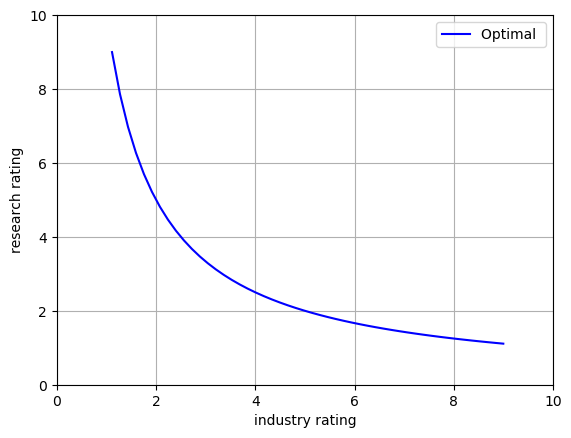

In [3]:
using PyPlot
#n = readline()
difficulty = 0.1
industry = range(1/9/difficulty,stop=9,length=50) # parameter that traverses the circle
optimal = 1 ./ (difficulty*industry) # radius and coordinates of the center
plot( industry, optimal, "b-")
#scatter( X[1,:], X[2,:], color="black") # plot the 50 points
xlabel("industry rating");
ylabel("research rating");
legend(["Optimal "])
axis([0,10,0,10])
grid()

#### 4. Areas of Interests ####

#### 4. Overall Model ####

## 3. Solution ##

Here, you should code up your model in Julia + JuMP and solve it. Your code should be clean, easy to read, well annotated and commented, and it should compile! You are not allowed to use other programming languages or DCP packages such as `convex.jl`. **We will be running your code**. Having multiple code blocks separated by text blocks that explain the various parts of your solution will make it much easier for us to understand your project. You may also solve several versions of your problem with different models/assumptions. **Remember that if you do not write your description of the project and commeent your code well, we cannot understand what you have done. Even if it is technically brilliant, you will loose points if you do not write well and comment your code well.**

It's fine to call external packages such as `Gurobi`, but try to minimize the use of other packages. We want to be able to understand what is happening in your code without looking up additional references. 

In [1]:
# this is a code block
using JuMP, Clp
m = Model(solver = ClpSolver())

things = [:horses, :donkeys, :goats]  # these are the things 
@variable(m, x[things] >= 0)          # the quantities of each of the things (can't be negative)
@constraint(m, sum(x) <= 10)          # we can't have any more than 10 things total
@objective(m, Max, x[:horses])        # we want to maximize the number of horses
solve(m)

for i in things
    println("The total number of ", i, " is: ", getvalue(x[i]))     # print result
end

┌ Info: Precompiling Clp [e2554f3b-3117-50c0-817c-e040a3ddf72d]
└ @ Base loading.jl:1273


ErrorException: The solver= keyword is no longer available in JuMP 0.19 and later. See the JuMP documentation (http://www.juliaopt.org/JuMP.jl/latest/) for latest syntax.

Remember to make sure your code compiles! I will be running your code!

## 4. Results and discussion ##

Here, you display and discuss the results. Show figures, plots, images, trade-off curves, or whatever else you can think of to best illustrate your results. The discussion should explain what the results mean, and how to interpret them. You should also explain the limitations of your approach/model and how sensitive your results are to the assumptions you made.

Use plots (see `PyPlot` examples from class), or you can display results in a table like this:

| Tables        | Are           | Cool  |
| ------------- |:-------------:| -----:|
| col 3 is      | right-aligned |\$1600 |
| col 2 is      | centered      |  \$12 |
| zebra stripes | are neat      |   \$1 |

### 5.A. Things not taken into account

Could add sampling weighs in:
    Section 2.1.2


#### 5.A.a. or subsubsections

## 5. Conclusion ##

Summarize your findings and your results, and talk about at least one possible future direction; something that might be interesting to pursue as a follow-up to your project.

## 6. Author Contributions

Note: The contributions in each category must sum to 100%. See Canvas for more details on what type of work belongs in each category.

#### 1. Modelling  
Student A: Percentage contribution %  
Student B: Percentage contribution %  
Student C: Percentage contribution %  

  
#### 2. Analysis  
Student A: Percentage contribution %  
Student B: Percentage contribution %  
Student C: Percentage contribution %  


#### 3. Data Gathering  
Student A: Percentage contribution %  
Student B: Percentage contribution %  
Student C: Percentage contribution %  


#### 4. Software Implementation  
Student A: Percentage contribution %  
Student B: Percentage contribution %  
Student C: Percentage contribution %  


#### 5. Report writing and poster presentation   
Student A: Percentage contribution %  
Student B: Percentage contribution %  
Student C: Percentage contribution %  

#### 5. Other Outside Attributrions
How Doctoral Students and Graduates Can Facilitate Boundary Spanning between Academia and Industry Kunttu_et_al_TIMReview_June2018.pdf (p52)